In [ ]:
from derive_conceptualspace.evaluate.shallow_trees import classify_shallowtree
from derive_conceptualspace.pipeline import SnakeContext, load_envfiles
from derive_conceptualspace.pipeline import cluster_loader
from derive_conceptualspace.settings import DEFAULT_N_CPUS
from derive_conceptualspace.util.desc_object import DescriptionList
from derive_conceptualspace.util.result_analysis_tools import getfiles_allconfigs
from derive_conceptualspace.util.threadworker import WorkerPool
from misc_util.logutils import setup_logging
from misc_util.pretty_print import display

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
setup_logging()
load_envfiles("siddata")
configs, print_cnf = getfiles_allconfigs("clusters", verbose=True)

In [ ]:
N_CPUS = DEFAULT_N_CPUS-1
with WorkerPool(N_CPUS, pgbar="Fetching clusters..") as pool:
    get_featureaxes = lambda conf: ((ctx := SnakeContext.loader_context(config=conf, silent=True)).get_important_settings(), ctx.load("clusters"), conf)
    perconf_list, interrupted = pool.work(configs, get_featureaxes)

In [ ]:
print("Number of clusters per configs:", [len(x[1]["clusters"]) for x in perconf_list])
display("Taking one of the configs with the most clusters...")
settings_str, clusters, conf = max(perconf_list, key=lambda x: len(x[1]["clusters"]))
display(settings_str[1])
display("Loading the rest of the necessary config...")
ctx, (embedding, descriptions) = (ctx := SnakeContext.loader_context(config=conf, silent=True)), ctx.load("embedding", "pp_descriptions")
display("loading done.")

# Classifying Fachbereich

Dropping 4520/11601 (38.96%) courses - there is no Fachbereich for them
63 courses are assigned more than 1 Fachbereich!


derive_conceptualspace/load_data/dataset_specifics/siddata2022.py:43: UserWarning: Will return the first Fachbereich for those ambiguous courses!


<span style="font-size:11pt">Using classes from fachbereich - 7081/11601 entities have a class</span>

<span style="font-size:11pt">Highest-ranking descriptions [with any class] per dimension:<br>    <span style="color: #0000ff">bibliotheken          </span>: Tutorium Orientierungsseminar (Gruppe I)<br>    <span style="color: #0000ff">verdeutlichen         </span>: Konzeptionen, Geschichte und Inhalte des Sachunterrichts (G1)<br>    <span style="color: #0000ff">opnv                  </span>: Tagesexkursion Agri-Food Cluster in Nord-West Niedersachsen<br>    <span style="color: #0000ff">schriftliche mundliche</span>: Kolloquium für Examenskandidaten<br>    <span style="color: #0000ff">blockveranstaltungen  </span>: Begleitung und Betreuung des Fachpraktikums Englisch im Herbst 2008<br>    <span style="color: #0000ff">schwierige            </span>: 1.14 Veränderungsmanagement im Prüfungswesen - Gelungene Kommunikation - auch in schwierigen Situationen<br>    <span style="color: #0000ff">erde                  </span>: Tutorium zur Vorlesung: System Lebewesen/Ökozonen<br>    <span style="color: #0000ff">bertolt brecht        </span>: Bertolt Brecht - Dramatische Arbeit (NDL 3)<br>    <span style="color: #0000ff">religionswissenschaft </span>: Friedrich Schleiermacher, Über die Religion: Reden an die Gebildeten unter ihren Verächtern<br>    <span style="color: #0000ff">vi                    </span>: AG Wissensbasierte Robotik<br>    <span style="color: #0000ff">erkrankungen          </span>: Verhaltensmedizin<br>    <span style="color: #0000ff">gesammelt             </span>: Bauen und Konstruieren als Thema im Sachunterricht (G2,3/H1,2,3,5)<br>    <span style="color: #0000ff">mitarbeiterinnen      </span>: 1.2 Arbeitsplatz Universität: Einführung für neue Mitarbeiterinnen und Mitarbeiter aber auch für andere Interessierte<br>    <span style="color: #0000ff">bietet uberblick      </span>: Einführung in die Sozialpsychologie (V)<br>    <span style="color: #0000ff">lineare               </span>: Datenanalyse I<br>    <span style="color: #0000ff">verhaltens            </span>: Praxiswerkstatt Klinische Psychologie: Einführung in die Positive Psychologie Beratung<br>    <span style="color: #0000ff">weist                 </span>: Grundlehre Performance<br>    <span style="color: #0000ff">parteien              </span>: Modul Vergleichende Politikwissenschaft I: Westliche Regierungssysteme im Vergleich<br>    <span style="color: #0000ff">aktivitaten           </span>: Projektmanagement (Teil des Seminars 2.119)<br>    <span style="color: #0000ff">texte verfassen       </span>: Gender !? - Einstieg in die Geschlechterforschung</span>

<span style="font-size:11pt">Labels (10 classes): <span style="color: #0000ff">Sprach-/Literaturwissenschaften</span>: 1663, <span style="color: #0000ff">Erziehungs-/Kulturwissenschaften</span>: 1998, <span style="color: #0000ff">Kultur-/Geowissenschaften</span>: 1439, <span style="color: #0000ff">Sozialwissenschaften</span>: 706, <span style="color: #0000ff">Rechtswissenschaften</span>: 333, <span style="color: #0000ff">Humanwissenschaften</span>: 366, <span style="color: #0000ff">Biologie/Chemie</span>: 158, <span style="color: #0000ff">Mathematik/Informatik</span>: 180, <span style="color: #0000ff">Physik</span>: 134, <span style="color: #0000ff">Wirtschaftswissenschaften</span>: 104</span>

<span style="font-size:11pt">Eval-Settings: type: <span style="color: #0000ff">one-vs-rest</span>, DT-Depth: <span style="color: #0000ff">1</span>, train-test-split:<span style="color: #0000ff"> 33.0% in test-set </span></span>

Some nodes will be renamed.
Some nodes will be renamed.
Some nodes will be renamed.
Some nodes will be renamed.
Some nodes will be renamed.


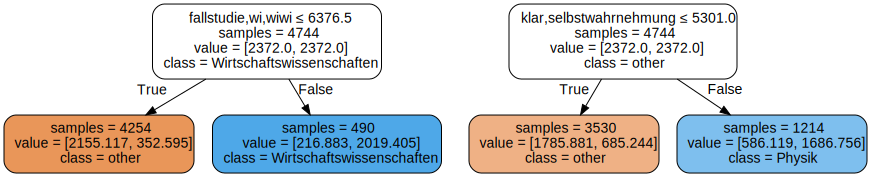

<span style="font-size:11pt"><br><br></span>

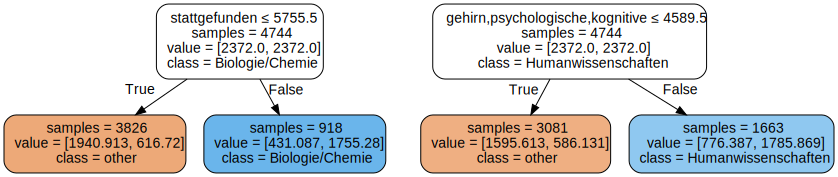

<span style="font-size:11pt"><br><br></span>

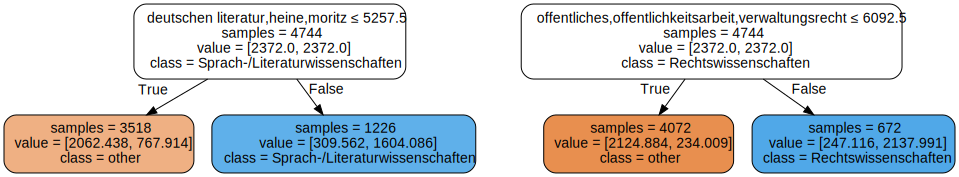

<span style="font-size:11pt"><br><br></span>

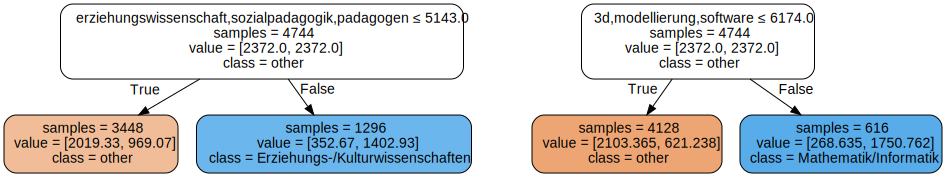

<span style="font-size:11pt"><br><br></span>

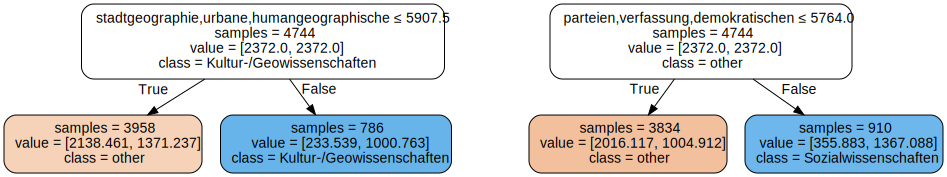

<span style="font-size:11pt"><br><br></span>

<span style="font-size:11pt">Per-Class-Scores: Wirtschaftswissenschaften: 0.92, Physik: 0.77, Biologie/Chemie: 0.83, Humanwissenschaften: 0.67, Sprach-/Literaturwissenschaften: 0.84, Rechtswissenschaften: 0.90, Erziehungs-/Kulturwissenschaften: 0.79, Mathematik/Informatik: 0.89, Kultur-/Geowissenschaften: 0.81, Sozialwissenschaften: 0.83</span>

<span style="font-size:11pt">Unweighted Mean Accuracy: 82.41%</span>

<span style="font-size:11pt">Weighted Mean Accuracy: 81.37%</span>

In [ ]:
# res = classify_shallowtree_multi(clusters, embedding, descriptions, ctx.obj["dataset_class"], verbose=True)
res = classify_shallowtree(clusters, embedding, descriptions, ctx.obj["dataset_class"], one_vs_rest=True, dt_depth=1, test_percentage_crossval=0.33, 
                           classes="fachbereich", verbose=True, return_features=False, balance_classes=True, do_plot=True)

<br><br><br><br><br><br><br><br>

# Classifying DDC

In [ ]:
res = classify_shallowtree(clusters, embedding, descriptions, ctx.obj["dataset_class"], one_vs_rest=True, dt_depth=1, test_percentage_crossval=0.33, 
                           classes="ddc_l1", verbose=True, return_features=False, balance_classes=True, do_plot=True)

## Another one, cause the other also looked good

In [ ]:
conf = {'dataset': 'siddata2022', 'debug': False, 'kappa_weights': 'quadratic', 'embed_dimensions': 200, 'embed_algo': 'mds', 'quantification_measure': 'tfidf', 'dcm_quant_measure': 'count', 'extraction_method': 'tfidf', 'translate_policy': 'onlyorig', 'pp_components': 'mfauhtcsldp', 'language': 'de', 'min_words_per_desc': 80, 'prim_lambda': 0.5, 'sec_lambda': 0.2, 'classifier_succmetric': 'kappa_digitized_onlypos_2', 'cluster_direction_algo': 'reclassify'}
ctx = SnakeContext.loader_context(config=conf, silent=True)
ctx.print_important_settings()
clusters, embedding, descriptions = ctx.load("clusters", "embedding", "pp_descriptions")

res = classify_shallowtree(clusters, embedding, descriptions, ctx.obj["dataset_class"], one_vs_rest=True, dt_depth=1, test_percentage_crossval=0.33,
                           classes="ddc_l1", verbose=True, return_features=False, balance_classes=True, do_plot=True)